# STUDIO DELL'ANDAMENTO DELL'ONDA

L'onda instaurata decresce all'aumentare della distanza tra emettitore e ricevitore. Presenta inoltre un'andamento oscillatorio dovuto alla presenza dell'onda stazionaria. Per campionare i valori sono state misurate le tensioni ai picchi di massimo e minimo variando la posizione del ricevitore

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from mylib import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'ampiezza_distanza.csv'
fr = pd.read_csv(FILE)

In [2]:
# dMIN = np.abs(np.array(fr['Ricevitore MIN (piede) (cm)']) - np.array(fr['Emettitore (piede) (cm)'])) * 0.01
dMAX = np.abs(np.array(fr['Ricevitore MAX (piede) (cm)']) - np.array(fr['Emettitore (piede) (cm)'])) * 0.01
sigmaD = np.sqrt(2) * 0.01 # incertezza sulle distanze
# Vmin = np.array(fr['Vmin (Volt)'])
Vmax = np.array(fr['Vmax (Volt)'])
# sigmaVmin = np.array(fr['sigmaVmin'])
sigmaVmax = np.array(fr['sigmaVmax'])

In [3]:
# f1 = lambda x,a,b: a/(x) + b
# f2 = lambda x,a,b: a/(x**2) + b
# i1 = Interpolazione(dMAX, Vmax,f1, sigmaVmin,[1,1])
# i2 = Interpolazione(dMAX, Vmax,f2, sigmaVmax,[1,1])
# plt.plot(dMIN, Vmin, 'o', label='Vmin')
# plt.plot(dMAX, Vmax, 'o', label='Vmax')
# plt.plot(i1.x_best, i1.y_best, label='fit Vmax 1/r1')
# plt.plot(i2.x_best, i2.y_best, label='fit Vmax 1/r2')
# plt.legend()
# plt.show()
# print(i1.rchisquare)
# print(i2.rchisquare)

# GRUPPO DI CONTROLLO

sono state raccolte ulteriori misure dei valori di picco spazzando distanze maggiori

In [4]:
maxControllo = np.array(fr['MAX (cm) controllo'])[0:7]
VmaxControllo = np.array(fr['Vmax (volt) controllo'])[0:7]
sigmaVmaxControllo = np.array(fr['sigmaVmax controllo'])[0:7]
dcontrollo = np.abs(maxControllo - np.array(fr['Emettitore controllo'])[0:7]) * 0.01
sigmaD = np.sqrt(2) * 0.01 * np.ones_like(dcontrollo)

$V(r) = \frac{a}{r} + b$

In [5]:
unosur = lambda r,a,b: a/r + b # andamento 1/r

fit = Interpolazione(dcontrollo, VmaxControllo, sigmaVmaxControllo, sigmaD, unosur, [1,1], ['a','b'])
print(fit)

----------------- VALORI FIT: -----------------
a:1.761 ± 0.066 
b:(-3.036 ± 0.93)e-1 

dof: 5
chi2: 8.8
chi2 ridotto: 2.0
------------------------------------------------



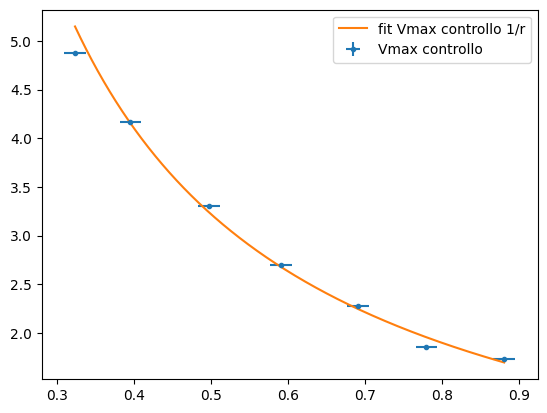

In [6]:
plt.errorbar(dcontrollo, VmaxControllo, yerr=fit.sigmaY,xerr=fit.sigmaX, fmt='.', label='Vmax controllo')
plt.plot(*fit.draw(), label='fit Vmax controllo 1/r')

# plt.errorbar(dMAX, Vmax,yerr=sigmaVmax,fmt= '.', label='Vmax')
plt.legend()
plt.show()